In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

import joblib


In [40]:
theft_data = pd.read_csv("df.csv")


In [41]:
print(theft_data.shape)
theft_data.head()


(100000, 12)


,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,5,22.182649,3.586221,0.013197,4.589925,8.1892,130.564942,121.623185,8.3497,0.592057,FullServiceRestaurant,Normal
1,6,38.131845,3.586221,0.007371,9.179851,19.4245,140.435454,117.967915,16.6994,5.768139,FullServiceRestaurant,Normal
2,7,45.597278,3.586221,0.007450,9.179851,26.9147,135.456017,105.213458,25.0491,5.193459,FullServiceRestaurant,Normal
3,10,42.435201,3.586221,0.008013,9.179851,26.9147,177.502298,117.699985,41.7485,18.053813,FullServiceRestaurant,Normal
4,16,45.546447,3.586221,0.005752,9.179851,26.9147,185.435196,124.339430,50.0982,10.997565,FullServiceRestaurant,Normal


In [42]:
theft_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   0                                           100000 non-null  int64  
 1   Electricity:Facility [kW](Hourly)           100000 non-null  float64
 2   Fans:Electricity [kW](Hourly)               100000 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            100000 non-null  float64
 4   InteriorLights:Electricity [kW](Hourly)     100000 non-null  float64
 5   InteriorEquipment:Electricity [kW](Hourly)  100000 non-null  float64
 6   Gas:Facility [kW](Hourly)                   100000 non-null  float64
 7   Heating:Gas [kW](Hourly)                    100000 non-null  float64
 8   InteriorEquipment:Gas [kW](Hourly)          100000 non-null  float64
 9   Water Heater:WaterSystems:Gas [kW](Hourly)  100000 non-null  float64
 1

In [43]:
LEAKAGE_COLS = ["Class"]
theft_data = theft_data.drop(columns=[c for c in LEAKAGE_COLS if c in theft_data.columns])


In [44]:
num_cols = theft_data.select_dtypes(include=["int64", "float64"]).columns

theft_data[num_cols] = theft_data[num_cols].fillna(theft_data[num_cols].median())


In [45]:
theft_data["theft_binary"] = theft_data["theft"].apply(
    lambda x: 0 if str(x).lower() == "normal" else 1
)


In [46]:
theft_data = theft_data.drop(columns=["theft"])


In [47]:
theft_data

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),theft_binary
0,5,22.182649,3.586221,0.013197,4.589925,8.189200,130.564942,121.623185,8.3497,0.592057,0
1,6,38.131845,3.586221,0.007371,9.179851,19.424500,140.435454,117.967915,16.6994,5.768139,0
2,7,45.597278,3.586221,0.007450,9.179851,26.914700,135.456017,105.213458,25.0491,5.193459,0
3,10,42.435201,3.586221,0.008013,9.179851,26.914700,177.502298,117.699985,41.7485,18.053813,0
4,16,45.546447,3.586221,0.005752,9.179851,26.914700,185.435196,124.339430,50.0982,10.997565,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,227942,39.176616,5.708487,1.757351,8.801412,15.367811,12.613462,6.847260,0.0000,5.766202,0
99996,227943,58.444202,5.812334,2.828512,18.508201,25.635382,12.172193,6.396574,0.0000,5.775619,0
99997,227944,72.792574,6.161965,6.024519,19.492656,41.100106,16.509633,4.925981,0.0000,11.583652,0
99998,227945,103.222222,6.696342,12.162448,26.328660,57.998833,29.592097,0.140780,0.0000,29.451317,0


In [48]:
TARGET = "theft_binary"

assert TARGET in theft_data.columns, "Target column not found"

X = theft_data.drop(columns=[TARGET])
y = theft_data[TARGET]


In [49]:
X

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,5,22.182649,3.586221,0.013197,4.589925,8.189200,130.564942,121.623185,8.3497,0.592057
1,6,38.131845,3.586221,0.007371,9.179851,19.424500,140.435454,117.967915,16.6994,5.768139
2,7,45.597278,3.586221,0.007450,9.179851,26.914700,135.456017,105.213458,25.0491,5.193459
3,10,42.435201,3.586221,0.008013,9.179851,26.914700,177.502298,117.699985,41.7485,18.053813
4,16,45.546447,3.586221,0.005752,9.179851,26.914700,185.435196,124.339430,50.0982,10.997565
...,...,...,...,...,...,...,...,...,...,...
99995,227942,39.176616,5.708487,1.757351,8.801412,15.367811,12.613462,6.847260,0.0000,5.766202
99996,227943,58.444202,5.812334,2.828512,18.508201,25.635382,12.172193,6.396574,0.0000,5.775619
99997,227944,72.792574,6.161965,6.024519,19.492656,41.100106,16.509633,4.925981,0.0000,11.583652
99998,227945,103.222222,6.696342,12.162448,26.328660,57.998833,29.592097,0.140780,0.0000,29.451317


In [50]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: theft_binary, Length: 100000, dtype: int64

In [51]:
X["energy_mean"] = X.mean(axis=1)
X["energy_std"] = X.std(axis=1)
X["energy_max"] = X.max(axis=1)
X["energy_min"] = X.min(axis=1)


In [52]:
X["range_ratio"] = (X["energy_max"] - X["energy_min"]) / (X["energy_mean"] + 1e-6)

X["sudden_drop"] = (X.diff(axis=1).min(axis=1) < -0.3).astype(int)

X["low_usage_flag"] = (X["energy_mean"] < X["energy_mean"].median()).astype(int)


In [53]:
X = X.loc[:, X.nunique() > 1]


In [54]:
X.columns = (
    X.columns
     .astype(str)
     .str.replace("[", "_", regex=False)
     .str.replace("]", "_", regex=False)
     .str.replace("<", "_", regex=False)
     .str.replace(">", "_", regex=False)
     .str.replace(" ", "_", regex=False)
)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [56]:
model = XGBClassifier(
    n_estimators=120,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42,
    n_jobs=-1
)


model.fit(X_train, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


## Evaluation

In [57]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11469
           1       0.99      0.90      0.95      8531

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000



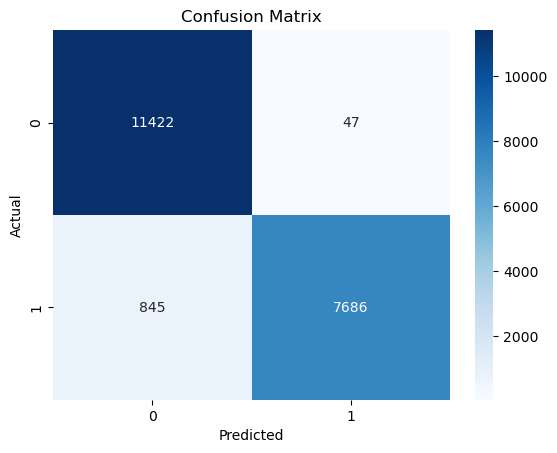

In [58]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## DATA VISUALIZATION

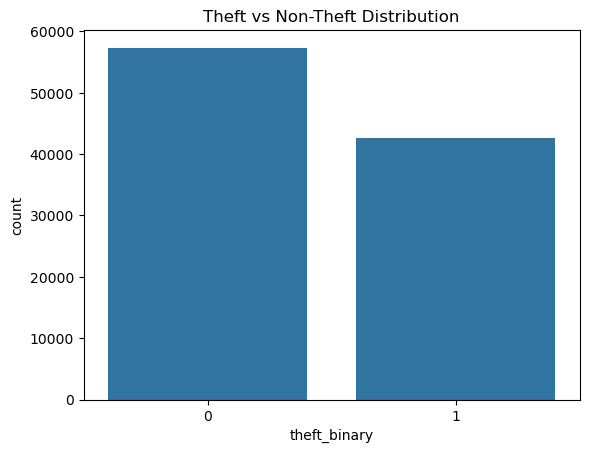

In [59]:
sns.countplot(x=y)
plt.title("Theft vs Non-Theft Distribution")
plt.show()


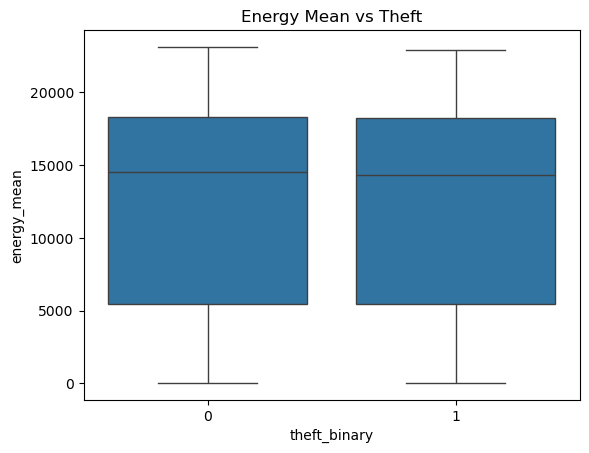

In [60]:
sns.boxplot(x=y, y=X["energy_mean"])
plt.title("Energy Mean vs Theft")
plt.show()


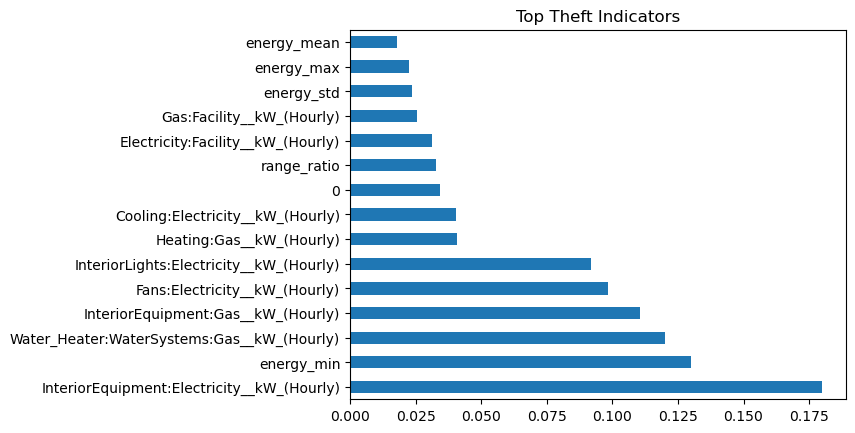

In [61]:
importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(15).plot(kind="barh")
plt.title("Top Theft Indicators")
plt.show()


In [62]:
joblib.dump(
    model,
    "electricity_theft_xgb_model.pkl",
    compress=3
)

joblib.dump(
    X.columns.tolist(),
    "model_features.pkl"
)


['model_features.pkl']